In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the file emails.csv

In [ ]:
df = pd.read_csv('emails.csv')

Display some data

In [ ]:
df.head()

,email,rec,elen,attch,slen,spam
0,eli302@outlook.com,10,235,1,35,1
1,eli194@outlook.com,3,211,1,19,0
2,eli415@me.com,17,232,1,69,1
3,eli105@aws.com,5,175,0,14,0
4,eli40@aws.com,5,67,1,10,0


Use describe to see some stats

In [ ]:
df.describe()

,rec,elen,attch,slen,spam
count,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000
mean,4.995335,168.602915,0.514869,16.709038,0.268805
std,5.070101,153.152677,0.499925,8.348653,0.443467
min,1.000000,2.000000,0.000000,10.000000,0.000000
25%,2.000000,88.500000,0.000000,12.000000,0.000000
50%,4.000000,144.000000,1.000000,15.000000,0.000000
75%,5.000000,206.000000,1.000000,18.000000,1.000000
max,24.000000,1089.000000,1.000000,70.000000,1.000000


How many spam emails we have?

In [ ]:
df['spam'].value_counts()

0    1254
1     461
Name: spam, dtype: int64

Use countplot to see how many ham/spam

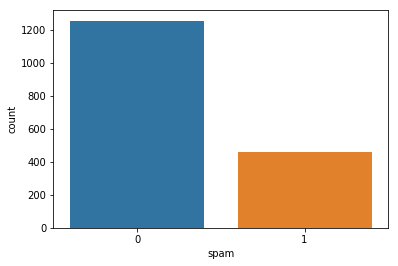

In [ ]:
sns.countplot(x='spam',data=df)

Use distplot to see the email len distribution

In [1]:
sns.distplot(df['elen'])

NameError: ignored

How many emails with len > 245 are spam?

In [ ]:
df[df['elen'] > 245]['spam'].value_counts()

1    113
0     31
Name: spam, dtype: int64

Use countplot to see if there is any relation between attachment and spam

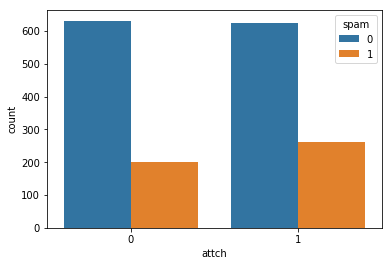

In [ ]:
sns.countplot(x='attch',hue='spam',data=df)

Use countplot to see if there is any relation between number of rec. and spam

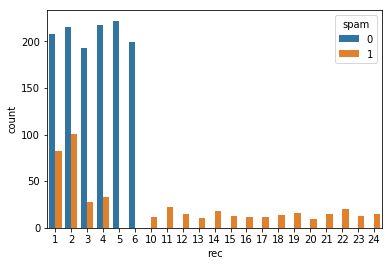

In [ ]:
sns.countplot(x='rec',hue='spam',data=df)

build the model, split to train and test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['email','spam'],axis=1), 
                                                    train['spam'], test_size=0.30, 
                                                    random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
predictions = logmodel.predict(X_test)

Create a classification report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92       367
          1       1.00      0.55      0.71       148

avg / total       0.89      0.87      0.86       515



Create a confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,predictions)

array([[367,   0],
       [ 67,  81]])

Check if email with 3 rec, len=59, no attachment and subject len=14 is a spam

In [ ]:
logmodel.predict(np.array([3, 59, 0, 14]).reshape(1, -1))

array([0])

Check if email with 12 rec, len=159, no attachment and subject len=24 is a spam

In [ ]:
logmodel.predict(np.array([12, 159, 0, 24]).reshape(1, -1))

array([1])